Требуется написать программу, вычисляющую значения первой и второй производной заданной функции $f(x)$ в произвольных точках $x$ по разностным схемам (1.3) и (1.5), соответственно. Наряду с вычислением производных программа должна определять погрешность вычислений производных. Результаты вычислений должны быть представлены графически (см., например, рис. 1.1).

Возьмем для исследования функцию $f(x) = sin(x)$, первая и вторая производные которой равны $f'(x) = cos(x)$ и $f''(x) = -sin(x)$, соответственно. Численные значения первой и второй производной, рассчитанные по приведенным выше разностным схемам, будем обозначать как $g1(x)$ и $g2(x)$, соответственно. Погрешности вычислений составят:\
$\epsilon_1(t) = |f'(t) - g1(t)|$\
$\epsilon_2(t) = |f''(t) - g2(t)|$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Text(0.5, 1.0, 'Изначальные значения')

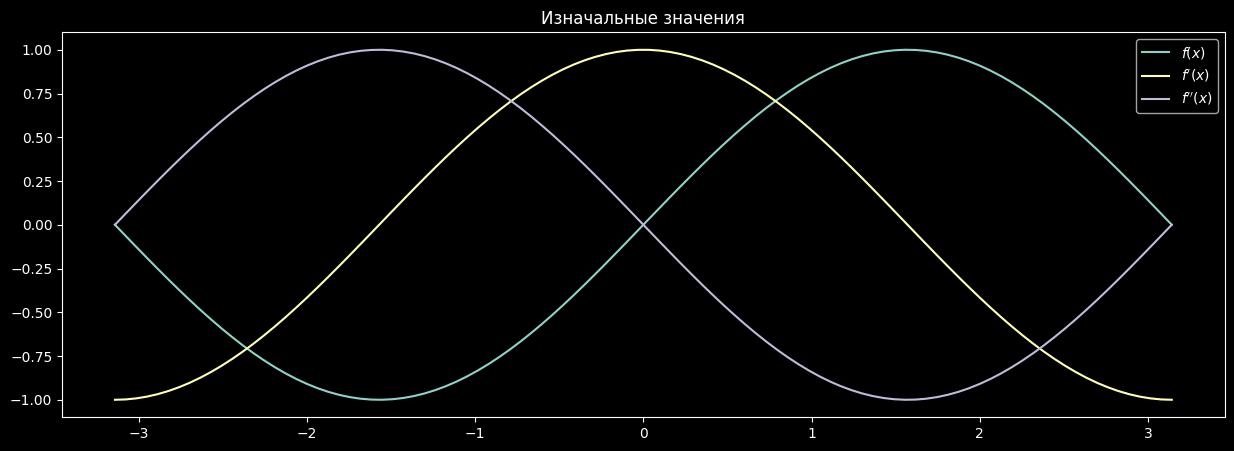

In [16]:
plt.figure(figsize=(15, 5))
X = np.linspace(-np.pi, np.pi, 100)
f = np.sin(X)
d1 = np.cos(X)
d2 = -f

plt.plot(X, f)
plt.plot(X, d1)
plt.plot(X, d2)
plt.legend(["$f(x)$", "$f'(x)$", "$f''(x)$"])
plt.title("Изначальные значения")


## Дифференцирование по 2-м узлам

In [31]:
def diff2point(fx, h):
    return (fx[1:] - fx[:-1]) / h

### Первая производная

Теоретическая погрешность: 0.002012647677322566
Практическая погрешность: 0.020200325001626912


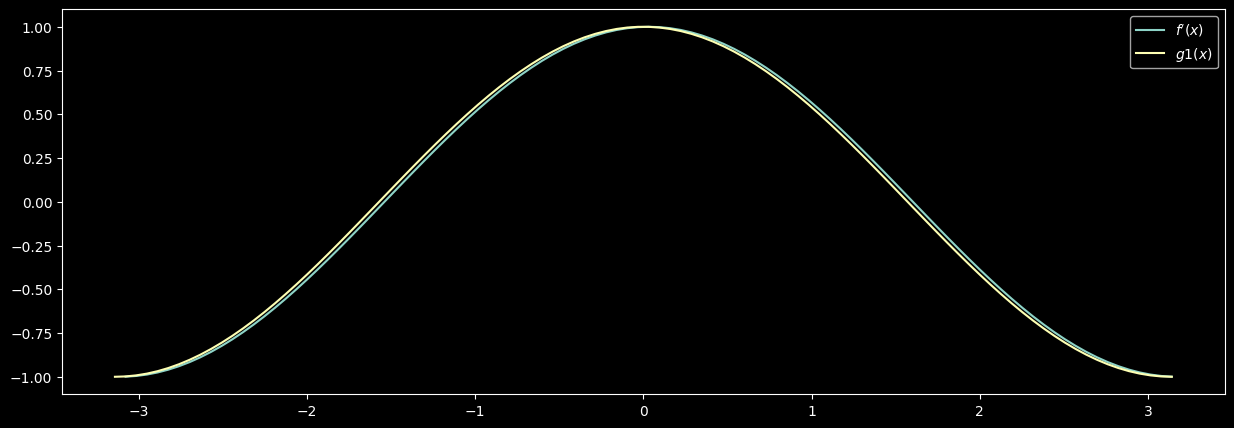

In [39]:
plt.figure(figsize=(15, 5))

# max |f''(x)|
M2 = abs(d2[:2]).max()
# h = x1 - x2
h = X[1] - X[0]
g1 = diff2point(f, h)

plt.plot(X[1:], g1)
plt.plot(X, d1)
plt.legend(["$f'(x)$", r"$g1(x)$"])
print(f"Теоретическая погрешность: {M2*h/2}")
print(f"Практическая погрешность: {abs(d1[1:] - g1).mean()}")


### Вторая производная

Теоретическая погрешность: 0.03173325912716973
Практическая погрешность: 0.040157157474534834


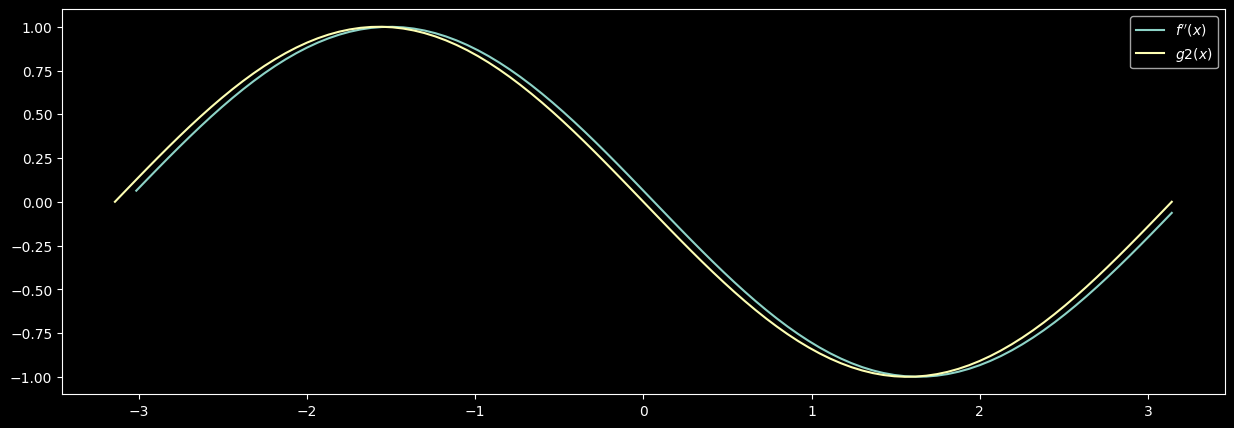

In [41]:
plt.figure(figsize=(15, 5))
# max |f''(x)|
M2 = abs((-d1)[:2]).max()
# h = x1 - x2
h = X[1] - X[0]

g2 = diff2point(g1, h)

plt.plot(X[2:], g2)
plt.plot(X, d2)
plt.legend(["$f''(x)$", r"$g2(x)$"])

print(f"Теоретическая погрешность: {M2*h/2}")
print(f"Практическая погрешность: {abs(d2[2:] - g2).mean()}")


## Дифференцирование методом неопределенных коэфициентов

In [42]:
def diff_und_coeff(fx, h):
    f0 = fx[:-2]
    f1 = fx[1:-1]
    f2 = fx[2:]
    return (-3 * f0 + 4 * f1 - f2) / 2 / h

### Первая производная

Практическая погрешность: 0.08158471138402298


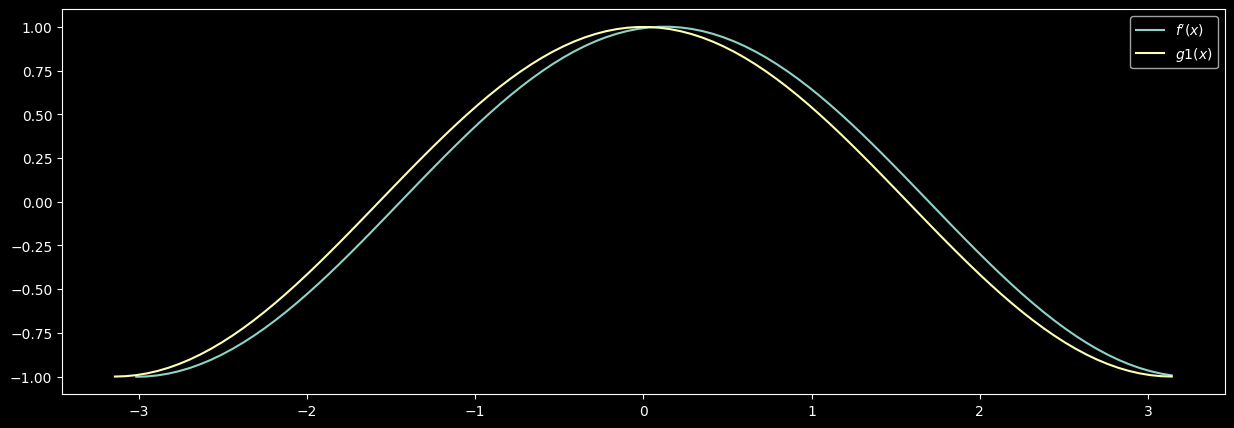

In [45]:
plt.figure(figsize=(15, 5))

g1 = diff_und_coeff(f, h)

plt.plot(X[2:], g1)
plt.plot(X, d1)
plt.legend(["$f'(x)$", r"$g1(x)$"])

print(f"Практическая погрешность: {abs(d1[2:] - g1).mean()}")


### Вторая производная

Практическая погрешность: 0.1584581164848221


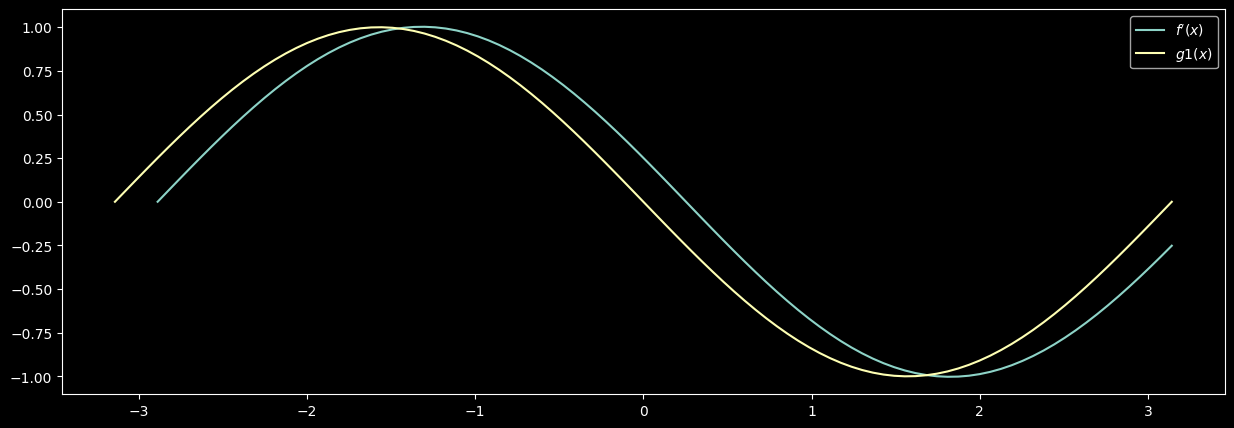

In [51]:
plt.figure(figsize=(15, 5))

g2 = diff_und_coeff(g1, h)

plt.plot(X[4:], g2)
plt.plot(X, d2)
plt.legend(["$f'(x)$", r"$g1(x)$"])

print(f"Практическая погрешность: {abs(d2[4:] - g2).mean()}")
